In [24]:
!grep layerType benchmark.log > tee benchmark.csv

In [25]:
import pandas as pd

In [56]:
logdata = pd.read_csv('benchmark.csv', sep='\s+', names=['Name', 'Exec', 'L_', 'OpType', 'R_', 'Real Time', 'C_', 'CPU Time', 'E_', 'ExecType'])

In [57]:
logdata = logdata.drop(columns=['L_', 'R_', 'C_', 'E_'])

In [58]:
logdata

,Name,Exec,OpType,Real Time,CPU Time,ExecType
0,input_1_U8_FP32_conv1/Conv2D,EXECUTED,Reorder,117,117,jit_uni_I8
1,conv1/Conv2D,EXECUTED,Convolution,5280,5280,jit_avx2_FP32
2,activation/Relu,NOT_RUN,ReLU,0,0,undef
3,max_pooling2d/MaxPool,EXECUTED,Pooling,817,817,jit_avx_FP32
4,res2a_branch1/Conv2D,EXECUTED,Convolution,2492,2492,jit_avx2_1x1_FP32
...,...,...,...,...,...,...
511,avg_pool/Mean/Pool_nChw8c_...,EXECUTED,Reorder,64,64,jit_uni_FP32
512,avg_pool/Mean/FinalReshape,EXECUTED,Reshape,12,12,unknown_FP32
513,fc1000/MatMul,EXECUTED,FullyConnected,1021,1021,gemm_blas_FP32
514,fc1000/Softmax,EXECUTED,SoftMax,32,32,ref_any_FP32


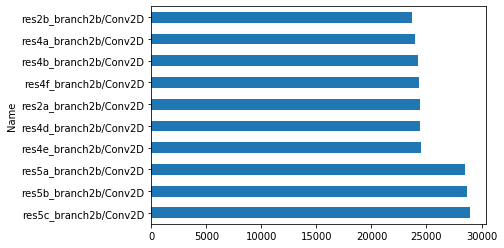

In [85]:
logdata.groupby('Name').sum()['Real Time'].sort_values(ascending=False)[:10].plot.barh()

In [77]:
t=logdata.groupby('Name').sum()['Real Time']